In [154]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Pie
from pyecharts.charts import Line

from snownlp import SnowNLP  # sentiment analysis

import re
import jieba
from itertools import chain  # 二维，一维列表转换
from collections import Counter
from wordcloud import WordCloud

In [155]:

file_path = r"../data/raw/xiaomi.csv"
df = pd.read_csv(file_path)
df

,username,content,likecount,date
0,SupremeWow,小米su7强势破圈太火爆了，雷总得抓紧提高产能啊,3025,2024/3/30 12:22
1,及米侠,感觉这次黑稿不太多，看来车圈还是更干净一些！,1725,2024/3/30 12:23
2,小麦Elite,小米手机1代回忆～,1020,2024/3/30 12:22
3,米12U,雷总辛苦了 感谢您为大家做了一辆Dream car,660,2024/3/30 12:22
4,Spider_boy666,雷总加电,650,2024/3/30 12:23
...,...,...,...,...
4568,春夏秋冬湖,欢迎雷军�,0,2024/5/18 19:58
4569,四季的暖窝,雷总，能不能发售ARE U OK大字母 运动包 能不能开MI家HOTEL，用SU7接送客人到MI家,0,2024/5/18 19:48
4570,米粉玩车局,中国平安的平安车险，未经本人允许，滥用本人姓名、电话、身份证信息，连续一个月车险客服电话骚扰...,0,2024/5/18 17:45
4571,浦东机场上空的轰鸣,不想体验你们的最新科技，雷嗨,0,2024/5/18 17:42


In [156]:
null_counts= df['content'].isnull().sum()
null_counts

np.int64(465)

In [157]:
df = df.dropna()

df = df.drop_duplicates()
df.shape

(3591, 4)

In [158]:
#cite the stop words doc
stopwords_file = '../data/lexicon/stopwords_cn.txt'
stopwords=[]

with open(stopwords_file,'r', encoding='utf-8') as f:
    for line in f: 
        stopwords.append(line.strip())

def tokenize(text):
    if not isinstance(text, str):
        return np.nan
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stopwords and word.strip()]
    filtered_text = ''.join(filtered_words)
    filtered_text_no_punctuation = re.sub(r'[^\w\s]', '', filtered_text)
    return filtered_text_no_punctuation

df['content'] = df['content'].apply(lambda x: str(x) if pd.notnull(x) else '')
# ensure they're string

df['tokenized_text'] = df['content'].apply(tokenize)

df.head()

,username,content,likecount,date,tokenized_text
0,SupremeWow,小米su7强势破圈太火爆了，雷总得抓紧提高产能啊,3025,2024/3/30 12:22,小米su7强势破圈火爆雷总得抓紧提高产能
1,及米侠,感觉这次黑稿不太多，看来车圈还是更干净一些！,1725,2024/3/30 12:23,感觉这次黑稿不太多看来车圈更干净
2,小麦Elite,小米手机1代回忆～,1020,2024/3/30 12:22,小米手机1代回忆
3,米12U,雷总辛苦了 感谢您为大家做了一辆Dream car,660,2024/3/30 12:22,雷总辛苦感谢您做Dreamcar
4,Spider_boy666,雷总加电,650,2024/3/30 12:23,雷总加电


In [159]:
df['tokenized_text'] = df['tokenized_text'].astype(str)

df['word'] = df['tokenized_text'].map(lambda c: ' '.join(jieba.cut(c)))
df.head()

,username,content,likecount,date,tokenized_text,word
0,SupremeWow,小米su7强势破圈太火爆了，雷总得抓紧提高产能啊,3025,2024/3/30 12:22,小米su7强势破圈火爆雷总得抓紧提高产能,小米 su7 强势 破圈 火爆 雷 总得 抓紧 提高 产能
1,及米侠,感觉这次黑稿不太多，看来车圈还是更干净一些！,1725,2024/3/30 12:23,感觉这次黑稿不太多看来车圈更干净,感觉 这次 黑稿 不太多 看来 车圈 更 干净
2,小麦Elite,小米手机1代回忆～,1020,2024/3/30 12:22,小米手机1代回忆,小米 手机 1 代 回忆
3,米12U,雷总辛苦了 感谢您为大家做了一辆Dream car,660,2024/3/30 12:22,雷总辛苦感谢您做Dreamcar,雷总 辛苦 感谢您 做 Dreamcar
4,Spider_boy666,雷总加电,650,2024/3/30 12:23,雷总加电,雷总加 电


In [160]:
list_1d = df['word'].tolist()
list_2d = []
for sentence in df['word']:
    words = sentence.split()
    list_2d.extend(words)


In [161]:
list_2d

['小米',
 'su7',
 '强势',
 '破圈',
 '火爆',
 '雷',
 '总得',
 '抓紧',
 '提高',
 '产能',
 '感觉',
 '这次',
 '黑稿',
 '不太多',
 '看来',
 '车圈',
 '更',
 '干净',
 '小米',
 '手机',
 '1',
 '代',
 '回忆',
 '雷总',
 '辛苦',
 '感谢您',
 '做',
 'Dreamcar',
 '雷总加',
 '电',
 '今天',
 '早上',
 '雷总',
 '发布会',
 '尤其',
 '汽车',
 '发布会',
 '最后',
 '鞠躬',
 '泪目',
 '相信',
 '总有一天',
 '全球',
 '一条',
 '道路',
 '看到',
 '小米',
 '汽车',
 '驰骋',
 '身影',
 '年轻人',
 '特别',
 '喜欢',
 'SU7',
 '定位',
 '成功',
 '梦想',
 '年轻',
 '人造',
 '车',
 '雷总祝',
 '小米',
 '汽车',
 '大卖',
 '体验',
 '拉满',
 '驾驶',
 '爱好者',
 '首选',
 '雷总',
 '车模',
 '一点',
 '根本',
 '买不到',
 '交付',
 '时间',
 '雷总',
 '网友',
 '生产',
 '相机',
 '价格',
 '干',
 '下来',
 '觉得',
 '公路',
 '车雷',
 '总',
 '认准',
 '小米',
 '汽车',
 '一定',
 '成为',
 '中国',
 '新能源',
 '汽车',
 '龙头',
 '买股',
 '买车',
 '十年',
 '前求',
 '父母',
 '买红米',
 'note1',
 '十年',
 '后求',
 '父母',
 '买',
 'su7',
 '家',
 '游戏',
 '剑',
 '网三要',
 '凉',
 '赛事',
 '组',
 '关系户',
 '操作',
 '比赛',
 '望雷',
 '总',
 '尽快',
 '推出',
 '1015w',
 '走量',
 '车型',
 '毕竟',
 '多数',
 '米粉',
 '打工',
 '阶层',
 '懂',
 '呀',
 '无能为力',
 '年纪',
 '遇到',
 '最想',
 '买车',
 '雷总',
 '出款',
 '相机',
 '喜欢'

/var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/ipykernel_54603/1365695042.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(d.keys()),y=list(d.values()), palette="Set2")


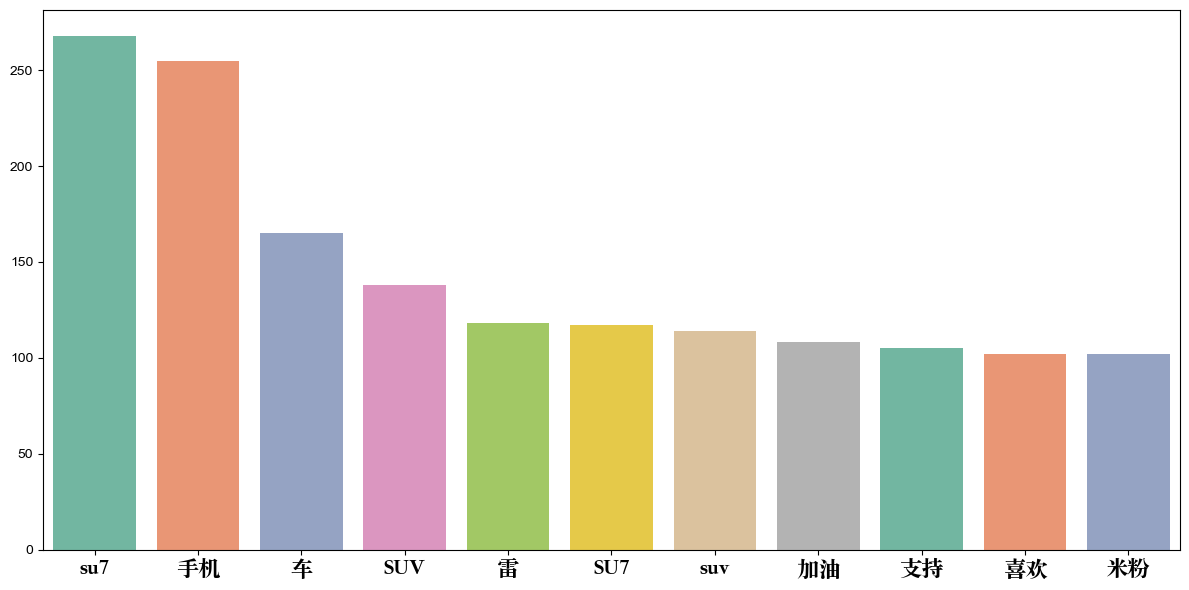

In [162]:
# 词频可视化  top15
c = Counter(list_2d)
common = c.most_common(15)

# 移除前四个最常见的结果
filtered_common = common[4:]

# 将词频结果转换为字典
d = dict(filtered_common)
# d = dict(common)

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname='/System/Library/Fonts/Supplemental/Songti.ttc', size=16)

plt.figure(figsize=(12,6))
sns.barplot(x=list(d.keys()),y=list(d.values()), palette="Set2")
plt.xticks(fontproperties=myfont)

# 保存图表
output_path = r'../outputs/figures/wordcloud/word_frequency.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [18]:
 list(d.values())

[1321, 989, 348, 306, 278, 258, 217, 214, 151, 145, 140]

/var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/ipykernel_54603/3200673827.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(d.keys()), y=percentage, palette="Set3")


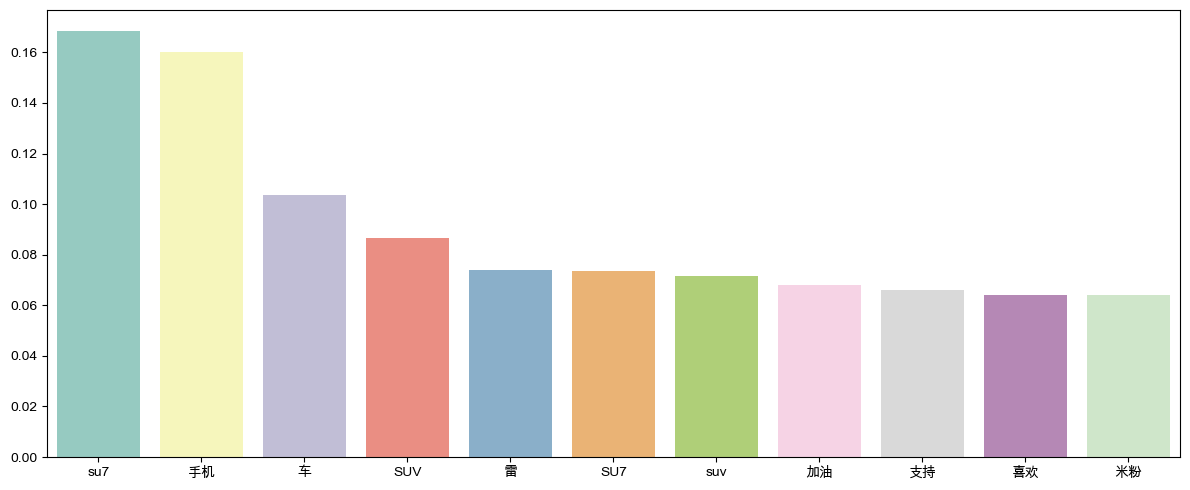

In [163]:
# 词频占比 top15
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
total = sum(d.values()) 
percentage = [v/ total for v in d.values()]
# print([f"{v:.2f}%" for v in percentage])
plt.figure(figsize=(12, 5))
sns.barplot(x=list(d.keys()), y=percentage, palette="Set3")

# 保存图表
output_path = r'../outputs/figures/wordcloud/word_frequency_proportion.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

/var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/ipykernel_54603/1566339698.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counter.keys()), y=list(counter.values()), palette="Set2")


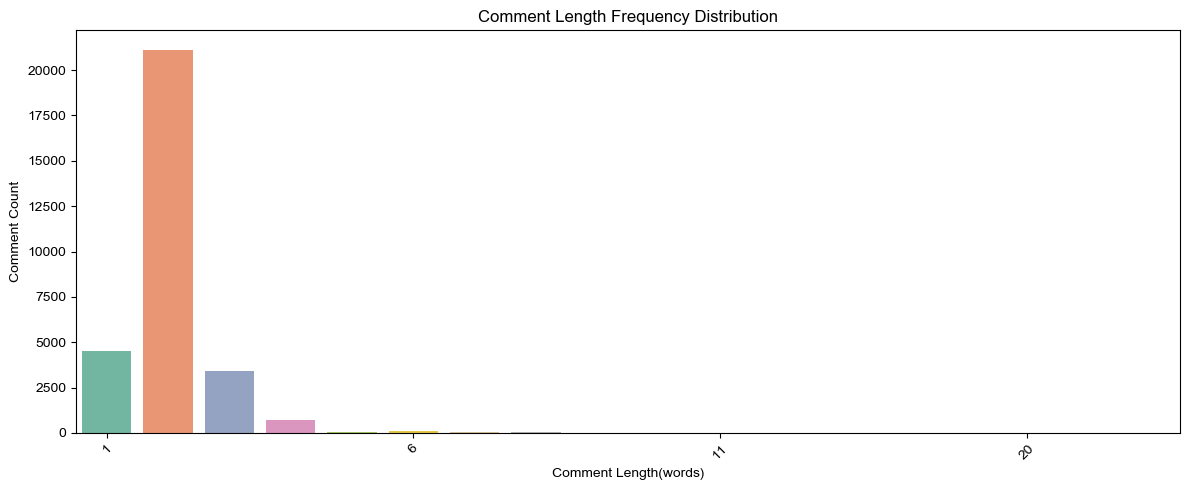

In [164]:
from collections import Counter

num = [len(li) for li in list_2d]
counter = Counter(num)
length = len(num)

plt.figure(figsize=(12, 5))
sns.barplot(x=list(counter.keys()), y=list(counter.values()), palette="Set2")

plt.xlabel("Comment Length(words)")
plt.ylabel("Comment Count")
plt.title("Comment Length Frequency Distribution")

plt.xticks(ticks=plt.xticks()[0][::5], rotation=45)  # 每隔 5 个刻度显示一次
# plt.xticks() 单独用的时候，其实返回的是一个 元组：(array([...]), [Text(...), Text(...), ...])

# 保存图表
output_path = r'../outputs/figures/wordcloud/comment_length_distribution.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

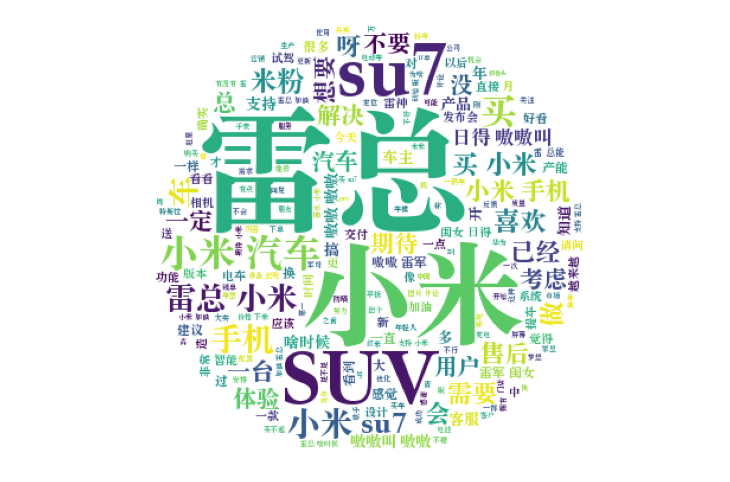

In [165]:
wc = WordCloud(font_path=r"/System/Library/Fonts/Supplemental/Songti.ttc",
               mask=plt.imread(r'../outputs/figures/wordcloud/circle_mask.jpg'),
               background_color='white')

join_words = ' '.join(list_1d)
img = wc.generate(join_words)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
wc.to_file(r"../outputs/figures/wordcloud/word_cloud.png")
plt.show()